# Franck-Hertz-Versuch

## Einlesen der Daten

/home/gabriel/anaconda3/envs/p4_312/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gabriel/anaconda3/envs/p4_312/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/gabriel/anaconda3/envs/p4_312/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/gabriel/anaconda3/envs/p4_312/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gabriel/anaconda3/envs/p4_312/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/g

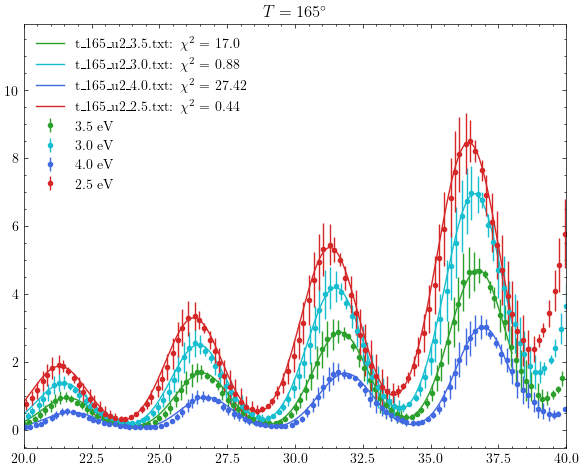

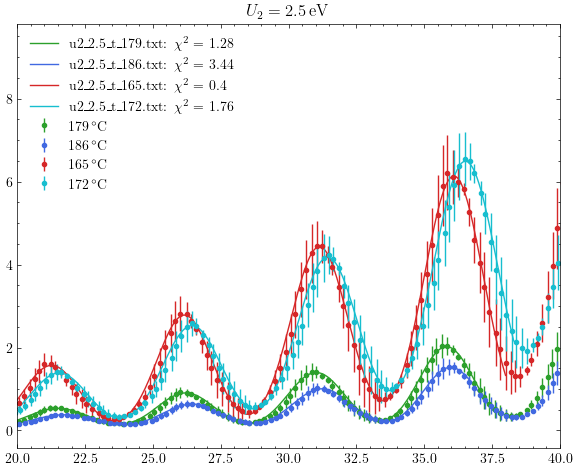

In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots.styles

plt.style.use("science")
plt.rcParams["figure.figsize"] = (7, 5.5)

data: dict[str, pd.DataFrame] = {}
data_path_rel: str = "../Data/Franck-Hertz/"

for file in os.listdir(data_path_rel):
    data[file] = pd.DataFrame(np.loadtxt(f"{data_path_rel}{file}", skiprows=1), columns=["U1", "U2"])

import gauss_fits_franck_hertz as gffh
output = gffh.do_gauss_fits()

output["x0"].to_csv("Frank-Hertz.csv")
colors: dict[str, str] = {
    "t_165_u2_2.5.txt": "tab:red",
    "t_165_u2_3.0.txt": "tab:cyan",
    "t_165_u2_3.5.txt": "tab:green",
    "t_165_u2_4.0.txt": "royalblue",
    "u2_2.5_t_165.txt": "tab:red",
    "u2_2.5_t_172.txt": "tab:cyan",
    "u2_2.5_t_179.txt": "tab:green",
    "u2_2.5_t_186.txt": "royalblue"
}

for i in data:
    #plt.ylim((-.2, 1))
    plt.xlim((20, 40))
    if "t_165_u2" in i:
        plt.figure(1)
        plt.title(r"$T = 165^\circ$")
        plt.errorbar(data[i].U1, data[i].U2, yerr=output[f"{i} error"], ms=3, label=f"{i[-7: -4]} eV", 
                    color=colors[i], marker="o", linestyle="")
        data_key = f"{i} fit_data"
        if data_key in output.keys():
            plt.plot(output[data_key]["x"], output[data_key]["y"], 
                     label=f"{i}: $\\chi^2$ = {round(output["chi_squared"][i], 2)}",
                     color=colors[i])
        plt.legend()
        
    if "u2_2.5_t_" in i:
        plt.figure(2)
        plt.title(r"$U_2 = 2.5\,\mathrm{eV}$")
        plt.errorbar(data[i].U1, data[i].U2, yerr=output[f"{i} error"], ms=3, 
                     label=f"${i[-7: -4]}\\,^\\circ$C ",
                    color=colors[i], marker="o", linestyle="")
        data_key = f"{i} fit_data"
        if data_key in output.keys():
            plt.plot(output[data_key]["x"], output[data_key]["y"], 
                     label=f"{i}: $\\chi^2$ = {round(output["chi_squared"][i], 2)}",
                     color=colors[i])
        plt.legend()
        

In [31]:
import pandas as pd

x: pd.DataFrame = pd.DataFrame(np.array([[1, 2, 3, 4], [np.nan, 2, 3, 1]])
                               .transpose(), columns=["x", "y"])
columns = x.columns.tolist()
diff = pd.DataFrame(x.iloc[1:].to_numpy() - x.iloc[:-1].to_numpy(), columns=columns)
print(diff)


     x    y
0  1.0  NaN
1  1.0  1.0
2  1.0 -2.0
